#Installing Pytorch Lightning

In [1]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 59.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

#Importing Required Libraries

In [2]:
import torch
import pytorch_lightning as pl
import numpy as np
import matplotlib.pyplot as plt

##Generating Synthetic Data for Non-Linear Regression
We begin by creating a synthetic dataset with 100 samples and 3 input features.
The target variable is computed using a non-linear quadratic relationship involving all three features.
To simulate real-world scenarios, we add Gaussian noise to the target, introducing variability to the data.

In [3]:
# Generate synthetic data (3-variable non-linear regression)
np.random.seed(42)
X = np.random.rand(100, 3).astype(np.float32)  # 100 samples, 3 features
y = (X[:, 0]**2 + X[:, 1]**2 + X[:, 2]**2 + np.random.randn(100) * 0.05).astype(np.float32).reshape(-1, 1)


##Converting numpy arrays to torch tensors

In [4]:
# Convert numpy arrays to torch tensors
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)


##Defining the Model with PyTorch Lightning
We now define a neural network using PyTorch Lightning, which simplifies the training loop and promotes modular, scalable deep learning workflows.

Key components of this model:

A 3-layer feedforward architecture designed for non-linear regression

Uses ReLU activations in the hidden layers

The training logic, optimizer configuration, and data loading are all encapsulated within the LightningModule

The model is trained using Mean Squared Error (MSE) loss and Stochastic Gradient Descent (SGD)

In [5]:
# PyTorch Lightning Model
class LightningNN(pl.LightningModule):
    def __init__(self):
        super(LightningNN, self).__init__()
        self.layer1 = torch.nn.Linear(3, 5)  # Input is now 3D
        self.layer2 = torch.nn.Linear(5, 5)
        self.layer3 = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=0.01)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = torch.nn.functional.mse_loss(y_pred, y)
        return loss

    def train_dataloader(self):
        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        return torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


# Instantiate the Lightning model
model = LightningNN()

##Training with PyTorch Lightning Trainer
Now that the model is defined, we use PyTorch Lightning’s Trainer to handle the training loop.
This abstracts away boilerplate code and handles epochs, progress display, and logging automatically.

We set the model to train for 1000 epochs

The progress bar gives live feedback on training

Validation checks can be configured if needed in more advanced setups

In [6]:
# PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=1000, enable_progress_bar=True, check_val_every_n_epoch=100)

# Train the model
trainer.fit(model)


INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type   | Params | Mode 
------------------------------------------
0 | layer1 | Linear | 20     | train
1 | layer2 | Linear | 30     | train
2 | layer3 | Linear | 6      | train
------------------------------------------
56        Trainable params
0         Non-trainable params
56        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batch

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


##4D Visualization of Model Predictions
To better understand the neural network’s output across 3 input features, we use a 3D scatter plot where:

X1, X2, and X3 define the position in space

The predicted target (y_pred) is represented using color

This visualization helps capture how the model interprets the input space and maps it to a non-linear output.

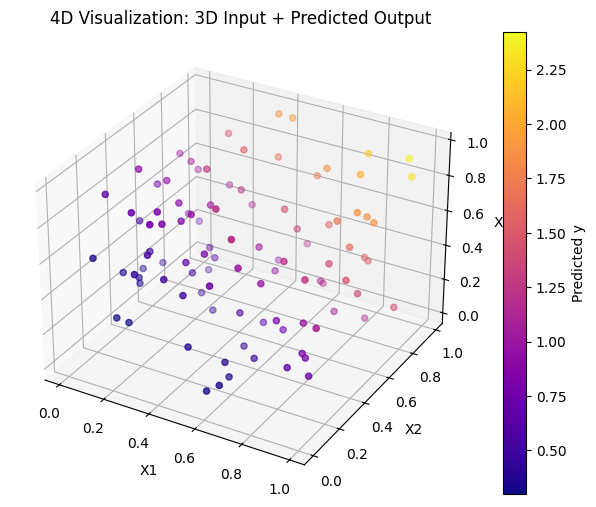

In [7]:
# 4D plot: X1, X2, X3 as position, y_pred as color
from mpl_toolkits.mplot3d import Axes3D

# Get predictions
y_pred = model(X_train).detach().numpy()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred[:, 0], cmap='plasma')
plt.colorbar(sc, ax=ax, label='Predicted y')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('4D Visualization: 3D Input + Predicted Output')
plt.show()
